In [165]:
import os
import time
import xml.etree.cElementTree as ET
tree = ET.parse('./registry.rdf')
root = tree.getroot()
number_of_element = len(root)
rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
xml="http://www.w3.org/XML/1998/namespace"
dct="http://purl.org/dc/terms/"
skos="http://www.w3.org/2004/02/skos/core#"
skosxl="http://www.w3.org/2008/05/skos-xl#"
svf="http://data.crossref.org/fundingdata/xml/schema/grant/grant-1.2/"
rdfs="http://www.w3.org/2000/01/rdf-schema#"
fref="http://data.crossref.org/fundingdata/terms"
schema = "https://none.schema.org/"

In [147]:
number_of_element

32250

In [170]:
fund_filtered_data = []
def search_rec(node: ET, elem):
    #print(node.tag)
    if node.tag != elem:
        res = set()
        for child in node:
            res.add(search_rec(child, elem))
        for i in res:
            if i != None:
                return i
        return None
    else:
        return node.text

for child in root:
    if str(child.tag) == "{%s}Concept"% skos:
        # here on every fund
        fund_url = child.get('{%s}about'%rdf)
        fund_org_name = search_rec(child, "{%s}literalForm"%skosxl)
        fund_org_region = search_rec(child, "{%s}region"%svf)
        fund_country = search_rec(child, "{%s}addressCountry"%schema)
        fund_type = search_rec(child, "{%s}fundingBodySubType"%svf)
        fund_filtered_data.append((fund_org_name, fund_org_region, fund_country, fund_type, fund_url))
        
      
        

In [171]:
fund_filtered_data

[('US National Science Foundation',
  'Americas',
  'usa',
  'National government',
  'http://dx.doi.org/10.13039/100000001'),
 ('Institutos Nacionales de la Salud',
  'Americas',
  'usa',
  'National government',
  'http://dx.doi.org/10.13039/100000002'),
 ('Boeing Co.',
  'Americas',
  'usa',
  'For-profit companies (industry)',
  'http://dx.doi.org/10.13039/100000003'),
 ('US Department of Defense',
  'Americas',
  'usa',
  'National government',
  'http://dx.doi.org/10.13039/100000005'),
 ('U.S. Office of Naval Research',
  'Americas',
  'usa',
  'National government',
  'http://dx.doi.org/10.13039/100000006'),
 ('David and Lucile Packard Foundation',
  'Americas',
  'usa',
  'Trusts, charities, foundations (both public and private)',
  'http://dx.doi.org/10.13039/100000008'),
 ('Foundation for NIH',
  'Americas',
  'usa',
  'Trusts, charities, foundations (both public and private)',
  'http://dx.doi.org/10.13039/100000009'),
 ('Ford Foundation Center for Social Justice',
  'Americ

In [184]:
import pandas as pd 
all_orgs = pd.DataFrame(fund_filtered_data, columns=['Name','region','country','type','url'])


In [185]:
all_orgs

,Name,region,country,type,url
0,US National Science Foundation,Americas,usa,National government,http://dx.doi.org/10.13039/100000001
1,Institutos Nacionales de la Salud,Americas,usa,National government,http://dx.doi.org/10.13039/100000002
2,Boeing Co.,Americas,usa,For-profit companies (industry),http://dx.doi.org/10.13039/100000003
3,US Department of Defense,Americas,usa,National government,http://dx.doi.org/10.13039/100000005
4,U.S. Office of Naval Research,Americas,usa,National government,http://dx.doi.org/10.13039/100000006
...,...,...,...,...,...
32243,RICS,Europe,nld,Research institutes and centers,http://dx.doi.org/10.13039/501100023406
32244,Vereniging Diervoederonderzoek Nederland,Europe,nld,Associations and societies (private and public),http://dx.doi.org/10.13039/501100023407
32245,Kara Technologies ltd,Europe,nld,For-profit companies (industry),http://dx.doi.org/10.13039/501100023408
32246,Wilderness Wildlife Trust,Africa,zaf,"Trusts, charities, foundations (both public an...",http://dx.doi.org/10.13039/501100023409


In [186]:
all_orgs.to_csv('formated_data.csv')

In [192]:
egyption_orgs = all_orgs.loc[all_orgs['country'] == 'egy'] 


In [193]:
egyption_orgs

,Name,region,country,type,url
4098,U.S. - Egypt Joint Board,Africa,egy,National government,http://dx.doi.org/10.13039/100007198
4686,National Research Centre,Africa,egy,National government,http://dx.doi.org/10.13039/100007787
4744,Ministry of Communication and Information Tech...,Africa,egy,National government,http://dx.doi.org/10.13039/100007845
4745,NTRA,Africa,egy,National government,http://dx.doi.org/10.13039/100007846
9508,ECEB,Africa,egy,Local government,http://dx.doi.org/10.13039/100012819
...,...,...,...,...,...
31101,Universidad Damietta,Africa,egy,Universities (academic only),http://dx.doi.org/10.13039/501100021124
31182,Zagazig University; Faculty of Science,Africa,egy,Universities (academic only),http://dx.doi.org/10.13039/501100021256
31312,Suez University,Africa,egy,Universities (academic only),http://dx.doi.org/10.13039/501100021546
31532,Université du Sud de la Vallée,Africa,egy,Universities (academic only),http://dx.doi.org/10.13039/501100022025


In [195]:
arab_country_names = {
    'dza',
    'bhr',
    'com',
    'egy',
    'irq',
    'jor',
    'kwt',
    'lbn',
    'lby',
    'mar',
    'mrt',
    'omn',
    'qat',
    'sau',
    'som',
    'are'
}

In [234]:
arab_orgs = {}
for x in arab_country_names:
    arab_orgs[x]=  all_orgs.loc[all_orgs['country'] == x]

# Pie-chart classifying Egy orgs by TYPE

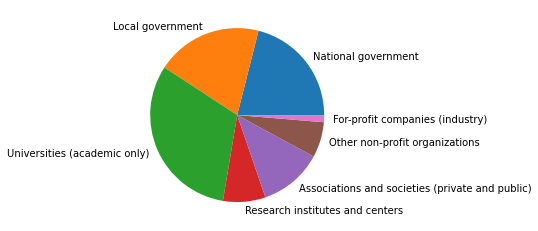

In [183]:
import matplotlib.pyplot as plt
import numpy as np

counts = {}
for name in egyption_orgs['type']:
    if counts.get(name) != None:
        counts[name] += 1
    else:
        counts[name] = 1
y = []
labels = []
for name, count in counts.items():
    y.append(count)
    labels.append(name)


plt.pie(y, labels = labels)
plt.show() 

# The highest number of non-profit, non-governmental research funders.

In [244]:
result = []
for name, data in arab_orgs.items():
    data = data.loc[(data['type'] != 'For-profit companies (industry)') |
             (data['type'] != 'National government') | 
             (data['type'] != "Local government")]
    result.append((len(data), name))

[(76, 'egy'), (10, 'kwt'), (24, 'mar'), (0, 'som'), (0, 'mrt'), (48, 'are'), (2, 'lby'), (11, 'dza'), (0, 'com'), (8, 'omn'), (25, 'irq'), (26, 'jor'), (23, 'lbn'), (3, 'bhr'), (20, 'qat'), (93, 'sau')]


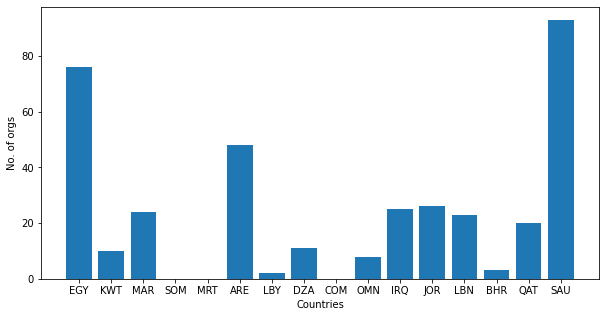

In [260]:
sorted(result, key=lambda x: x[0])
print(result)
countries = [x[1].upper() for x in result]
values = [x[0] for x in result]
fig = plt.figure(figsize = (10, 5))
plt.bar(countries, values)
plt.xlabel("Countries")
plt.ylabel("No. of orgs")
plt.show()